In [77]:
#IMPORTING ESSENTIAL LIBRARIES
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

In [78]:
#Read the data
first = pd.read_csv('C:\\Users\\sriva\\Desktop\\M L\\news\\news.csv')
second = pd.read_csv('C:\\Users\\sriva\\Desktop\\M L\\news\\fake_news_manual.csv')
toi_news = pd.read_csv('C:\\Users\\sriva\\Desktop\\M L\\news\\toi_news.csv')
the_hindu = pd.read_csv('C:\\Users\\sriva\\Desktop\\M L\\news\\the_hindu_news.csv')
#Get head
df = pd.concat([first, second, toi_news, the_hindu])
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [79]:
#Get Shape-DataFrame stores the number of rows and columns as a tuple
df.shape

(14083, 4)

In [80]:
#DataFlair - Get the labels
labels=df['label']
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

# Training the Data Sets & Calculating using TP

In [81]:
title = df['title']

In [82]:
# Instantiate the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(ngram_range=(1,5))

In [83]:
#DataFlair--Seperate the data into traning and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(title, labels, test_size=0.2, random_state=7)

In [84]:
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(x_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(x_test)

#print(training_data)-testing the datasets
#print(testing_data)-testing the datasets

In [85]:
# Make model and fit it
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [86]:
predictions = naive_bayes.predict(testing_data)
predictions
#Printing The Predictions

array(['REAL', 'FAKE', 'FAKE', ..., 'FAKE', 'REAL', 'REAL'], dtype='<U4')

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions, average="binary", pos_label="REAL")))
print('Recall score: ', format(recall_score(y_test, predictions, average="binary", pos_label="REAL")))
print('F1 score: ', format(f1_score(y_test, predictions, average="binary", pos_label="REAL")))

Accuracy score:  0.873269435569755
Precision score:  0.8469773299748111
Recall score:  0.9218642906100069
F1 score:  0.8828355759763703


# TexT implementation

In [88]:
text = df['text']

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(ngram_range=(1,5))

# Seperate the data into traning and testing 
from sklearn.model_selection import train_test_split
x_train_text,x_test_text,y_train_text,y_test_text=train_test_split(text, labels, test_size=0.2, random_state=7)

In [90]:
# Fit the training data and then return the matrix
training_data_text = count_vector.fit_transform(x_train_text)
# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data_text = count_vector.transform(x_test_text)

In [91]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data_text, y_train_text)

MultinomialNB()

In [92]:
predictions_text = naive_bayes.predict(testing_data_text)
predictions_text

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'REAL', 'REAL'], dtype='<U4')

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print('Accuracy score: ', format(accuracy_score(y_test_text, predictions_text)))
print('Precision score: ', format(precision_score(y_test_text, predictions_text, average="binary", pos_label="REAL")))
print('Recall score: ', format(recall_score(y_test_text, predictions_text, average="binary", pos_label="REAL")))
print('F1 score: ', format(f1_score(y_test_text, predictions_text, average="binary", pos_label="REAL")))

Accuracy score:  0.9059282925097621
Precision score:  0.8807397959183674
Recall score:  0.9465387251542152
F1 score:  0.9124545754872811


# Creating and Plotting Confusion Matrix

In [94]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization

In [95]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [101]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 85.2%


In [102]:
#DataFlair - Build confusion matrix
print("***__Confusion Matrix is Printed Below__:***")
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])


***__Confusion Matrix is Printed Below__:***


array([[1126,  232],
       [ 185, 1274]], dtype=int64)

In [103]:
# # Cofusion Matrix for text
# tnt, fpt, fnt, tpt = confusion_matrix(y_test_text, predictions_text).ravel()
# (tnt, fpt, fnt, tpt)

In [104]:
def generate_confusion_matrix(y_test, y_pred):
    """Generate a confusion matrix based on a seaborn heatmap."""
    cm = confusion_matrix(y_test,y_pred)
    # visualize confusion matrix with seaborn heatmap
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1',
                                               'Actual Negative:0'],
                            index=['Predict Positive:1', 'Predict Negative:0'])
    fig, ax = plt.subplots(figsize=(7,7))  
    return sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu');

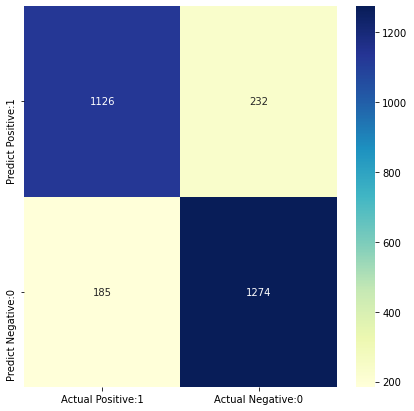

In [105]:
generate_confusion_matrix(y_test=y_test, y_pred=y_pred);

# Final Detection~Manually

In [106]:
title = df['title']
text = df['text']

In [107]:
# Instantiate the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(ngram_range=(1,1))
count_vector_text = CountVectorizer(ngram_range=(1,1))

In [108]:
# Seperate the data into traning and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(title, labels, test_size=0.2, random_state=7)
x_train_text,x_test_text,y_train_text,y_test_text=train_test_split(text, labels, test_size=0.2, random_state=7)


In [109]:
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(x_train)
training_data_text = count_vector_text.fit_transform(x_train_text)

# Checking The Fake One's

In [110]:
input_news = """
A viral image falsely claims that drinking a 'corona kashayam' made by boiling turmeric, cloves, lemons, and ginger with water will cure COVID-19 positive patients. #BOOMFactCheck #COVID19 #CoronaVirusFacts
"""

In [111]:
testing_data = count_vector.transform([input_news])
testing_data_text = count_vector.transform([input_news])

# Making the model and fit it
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes_text = MultinomialNB()

# Fitting the model
naive_bayes.fit(training_data, y_train)
naive_bayes_text.fit(training_data_text, y_train_text)

# Predicting
predictions = naive_bayes.predict(testing_data)
print(predictions)
predictions_text = naive_bayes.predict(testing_data_text)
print(predictions_text)

['FAKE']
['FAKE']


# Checking the True News

In [112]:
input_news = """
An ultra-light airplane collided on October 10 with another small plane, killing five people as the two aircraft fell into gardens around a small town in #France"""

In [113]:
testing_data = count_vector.transform([input_news])
testing_data_text = count_vector.transform([input_news])

# Making the model and fit it
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes_text = MultinomialNB()

# Fitting the model
naive_bayes.fit(training_data, y_train)
naive_bayes_text.fit(training_data_text, y_train_text)

# Predicting
predictions = naive_bayes.predict(testing_data)
print(predictions)
predictions_text = naive_bayes.predict(testing_data_text)
print(predictions_text)

['REAL']
['REAL']
